# Task 4 - Causal Effect of Motivational Messages on Student Engagement using the Front Door Criterion
## Outline
### 1. The Front Door Criterion
* Definition and explanation of the fornt door criterion in causal inference
* Relevance to understanding the effects of interventions
### 2. Variables
* Main Variables
* Mediator
* Control Variables
### 3. Conditions for the front door criterion
* Condition 1
* Condtion 2
* Condition 3
### 4. Application example
* Hypothetical, simplified model description (motivational messages on student engagement)
* Measurement of effect of front door criterion of motivational messages on student engagement
### 5. Conclusion
* Summary of importance of the front door criterion in providing reliable causal estimates in educational settings
* Implications for designing interventions to enhance student engagement

## Sources
1. Causal inference challenges and new directions for epidemiologic research on the health effects of social policies - https://link.springer.com/article/10.1007/s40471-022-00288-7
2. On testability of the front-door model via Verma constraints - https://proceedings.mlr.press/v180/bhattacharya22a.html
3. Causal inference in statistics: An overview - https://projecteuclid.org/journals/statistics-surveys/volume-3/issue-none/Causal-inference-in-statistics-An-overview/10.1214/09-SS057.full
4. Robust inference in population indirect causal effects: the generalized front door criterion - https://academic.oup.com/jrsssb/article/82/1/199/7056027
5. A survey on causal inference for recommendation - https://www.cell.com/the-innovation/pdf/S2666-6758(24)00028-6.pdf

## Example
### Scenario
Our goal is to use the front door criterion to measure the causal effect of motivational messages on student engagement. 
### 1. Identify the variables: 
* X (Treatment): Motivational message (0 = not sent , 1 = sent)
* Y (Outcome): Student engagement measured on a continous scale from 0 to 1
* M (Mediator): Perception of message by the student (0 = negative, 1 = positive)
* Z (Control Variable): Initial engagement level of the student measured on acontinous scale from 0 to 1 
### 2. Steps:
#### First stage (Model the effect of X on M, controlling for Z):
* This model estimates the impact of the treatment (sending messages) on the perception of the message, controlling for initial engagement
* M=α+β1×X+β2×Z+ϵ
#### Second stage (Model the effect of M on Y, controlling for X and Z):
* This model estimates the effect of message perception on student engagement, while controlling for both the direct effect of the motivational messages and the initial engagement level. 
* Y=γ+δ1×M+δ2×X+δ3×Z+ν
#### Compute the Controlled Direct Effect (CDE) amd Total Effect (TE):
* Controlled Direct Effect: Direct effect of X on Y controlling for M and Z. Given by the coefficient of X in the second-stage regression
* Total Effect: Overall effect of X on Y mediated through M and controlled by Z. Computed as β1×δ1 from the two models. 
### 3. Adherence to Front Door Criterion
#### The intervention must affect the mediator: 
In our model this means that the treatment X, sending of motivational messages, must influence the mediator, the students perception of the message. We can intuitivly say that this is true and we can model it through the first stage regression. β1 should be significant, indicating that X has a noticable effect on M.
#### There should be no unmeasured confounding between the mediator and the outcome:
In other words we need to measure and control all variables that affect both the mediator and the outcome. In our case the this is variable (Z) the initial engagement. By including Z in both stages, we control for its confounding effect, ensuring the relationship between M and Y is not spurious.
#### The Mediator must affect the outcome, and all paths from the intervention through the mediator to the outcome should be included in the model. 
Our second stage model estimates the effect of the mediator on the outcome while controlling for the direct effect of the treatment and the initial engagement levels. The effect of the mediator on the outcome is represented by δ1, which should be significant if the front door criterion is to hold. 
### 4. Causal Effect Measures
#### Controlled Direct Effect (CDE):
Measures the direct effect of the treatment on the outcome while controlling for both the mediator and any confounders. In our case this helps to understand both the direct and mediated effects. 
#### Total Effect (TE):
Is the combined effect of all paths from the treatment to the outcome, including both direct and mediated paths. This captures the overall impact of the treatment, encompassing all mechanisms through which it works. 


In [224]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from scipy.special import expit as sigmoid

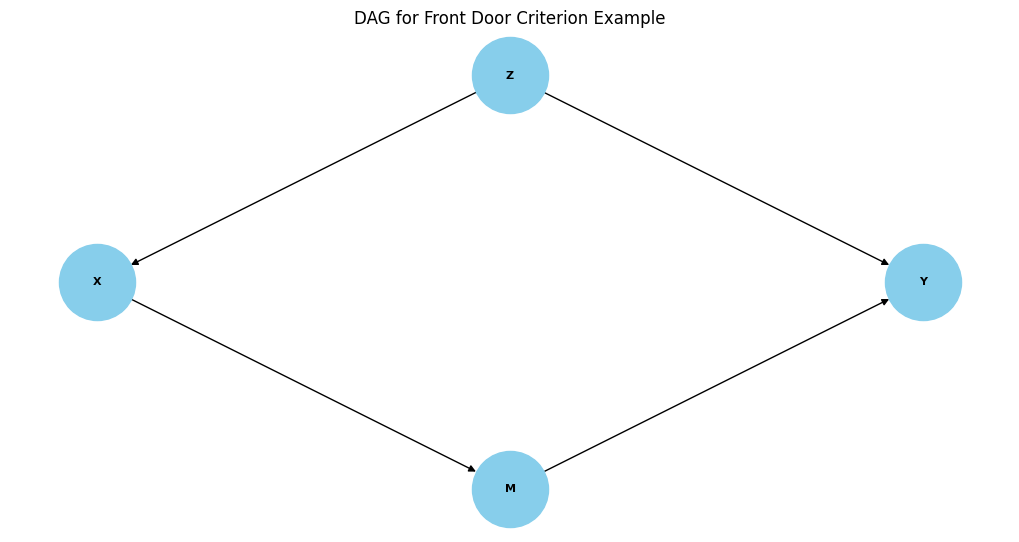

In [225]:
Graph = nx.DiGraph()
Graph.add_edges_from([
    ('X', 'M'),
    ('M', 'Y'), 
    ('Z', 'X'),
    ('Z', 'Y'),

])

pos_G = nx.shell_layout(Graph)
plt.figure(figsize=(10, 5))
nx.draw(Graph, pos_G, with_labels=True, node_size=3000, node_color='skyblue', font_size=8, font_weight='bold')

plt.title('DAG for Front Door Criterion Example')
plt.show()

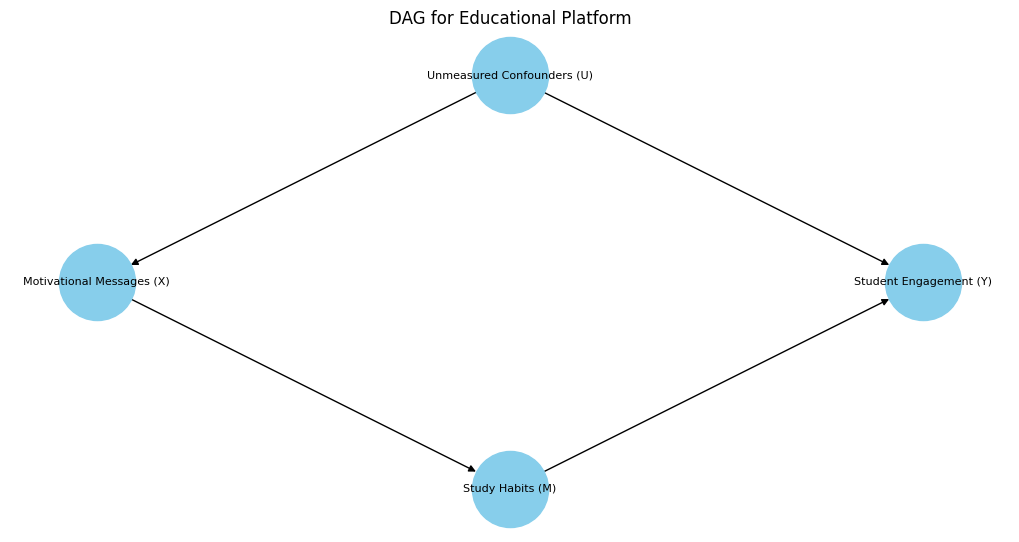

In [226]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
nodes = {
    'X': 'Motivational Messages (X)',
    'M': 'Study Habits (M)',
    'Y': 'Student Engagement (Y)',
    'U': 'Unmeasured Confounders (U)',
}

# Add edges with labels
edges = [
    ('X', 'M'),
    ('M', 'Y'),
    ('U', 'Y'),
    ('U', 'X')
]
G.add_edges_from(edges)

plt.figure(figsize=(10, 5))

pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=False, node_size=3000, node_color='skyblue', font_size=8, font_weight='bold')

for p in pos:  # raise text positions
    pos[p][1] += 0.0
nx.draw_networkx_labels(G, pos, labels=nodes, font_size=8)


plt.title('DAG for Educational Platform')
plt.show() 

In [227]:
# Data Generation
np.random.seed(73)
data_size = 1000

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Confounder U
U = np.random.normal(0, 1, data_size) #random continous variable, this is would not be measured in real world data but we need it to simulate the effect of unmeasured confounders

# Treatment/Intervention X
X = np.random.binomial(1, 0.5 + 0.2 * U / 10, data_size)  #Probability influenced by U

# Mediator M
M = sigmoid(0.5 + 0.3 * X + np.random.normal(0, 0.1, data_size)) #Influenced by X, we assume that habits can be measured on a continuous scale

# Outcome Y
Y = sigmoid(0.5 + 0.3 * M + 0.1 * U + np.random.normal(0, 0.1, data_size)) #Influenced by M and U

df = pd.DataFrame({'U': U, 'X': X, 'M': M, 'Y': Y})

df.head()

,U,X,M,Y
0,0.576813,0,0.613234,0.678438
1,2.131109,1,0.711984,0.726367
2,2.440220,0,0.607327,0.710669
3,0.263327,1,0.689855,0.698325
4,-1.496121,1,0.665414,0.580657


In [228]:

# Step 1: Estimate P(M|X) using linear regression
model_m_x = LinearRegression()
model_m_x.fit(df[['X']], df['M'])

# Predict P(M|X)
df['P_M_given_X'] = model_m_x.predict(df[['X']])

# Step 2: Estimate P(Y|X, M) using linear regression
model_y_xm = LinearRegression()
model_y_xm.fit(df[['X', 'M']], df['Y'])

# Predict P(Y|X, M)
df['P_Y_given_XM'] = model_y_xm.predict(df[['X', 'M']])

# Step 3: Calculate the marginal probability of X
p_x_prime = df['X'].value_counts(normalize=True).sort_index()

# Step 4: Calculate E[Y|do(X=1)] and E[Y|do(X=0)] using the full formula
def calculate_do_y(df, x_value):
    do_y = 0
    unique_m_values = np.linspace(df['M'].min(), df['M'].max(), 100)  # Discretize M
    for m_value in unique_m_values:
        p_m_given_x = model_m_x.predict([[x_value]])[0]
        inner_sum = 0
        for x_prime in p_x_prime.index:
            p_y_given_xm = model_y_xm.predict([[x_prime, m_value]])[0]
            inner_sum += p_y_given_xm * p_x_prime[x_prime]
        do_y += inner_sum * p_m_given_x
    return do_y / len(unique_m_values)

do_y_given_x1 = calculate_do_y(df, 1)
do_y_given_x0 = calculate_do_y(df, 0)

# Estimate the causal effect of X on Y
causal_effect = do_y_given_x1 - do_y_given_x0
print(f'Estimated Causal Effect of X on Y: {causal_effect}')

Estimated Causal Effect of X on Y: 0.04501340468169773


/Users/stahlma/Desktop/Studium/Inference_and_Causality/Code/advanced-workbook-code/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/stahlma/Desktop/Studium/Inference_and_Causality/Code/advanced-workbook-code/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/stahlma/Desktop/Studium/Inference_and_Causality/Code/advanced-workbook-code/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/stahlma/Desktop/Studium/Inference_and_Causality/Code/advanced-workbook-code/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature